In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk

from sklearn import ensemble
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

In [34]:
data_path = ("~/Downloads/sentiment labelled sentences/yelp_labelled.txt"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['text', 'sentiment']

In [35]:
sms_raw.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [36]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [37]:
norm_corpus = normalize_corpus(sms_raw['text'])
norm_corpus

array(['wow loved place', 'crust good', 'tasty texture nasty',
       'stopped late may bank holiday rick steve recommendation loved',
       'selection menu great prices', 'getting angry want damn pho',
       'honeslty didnt taste fresh',
       'potatoes like rubber could tell made ahead time kept warmer',
       'fries great', 'great touch', 'service prompt', 'would go back',
       'cashier care ever say still ended wayyy overpriced',
       'tried cape cod ravoli chickenwith cranberrymmmm',
       'disgusted pretty sure human hair', 'shocked signs indicate cash',
       'highly recommended', 'waitress little slow service',
       'place worth time let alone vegas', 'like', 'burrittos blah',
       'food amazing', 'service also cute',
       'could care less interior beautiful', 'performed',
       'thats rightthe red velvet cakeohhh stuff good',
       'never brought salad asked',
       'hole wall great mexican street tacos friendly staff',
       'took hour get food tables rest

In [38]:
#Bag of Words equivalent
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
dtm_bow=pd.DataFrame(cv_matrix, columns=vocab)

In [40]:
#dtm is a document term matrix. This contains the count for all the words in the document
dtm_bow

,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledged,...,yelpers,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Y is the labeled data and X is all terms contained inside the document term matrix
Y = sms_raw['sentiment']
X_bow = dtm_bow

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)

# Random Forest - bag of words

In [43]:
rfc = ensemble.RandomForestClassifier()


train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9933333333333333

Test set score: 0.73


# N-grams

In [44]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(sms_raw['text'])

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
dtm_ngram=pd.DataFrame(bv_matrix, columns=vocab)

In [45]:
X_ngram=dtm_ngram

# Random Forest with N-grams

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_ngram, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)

In [47]:
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9683333333333334

Test set score: 0.5625


**N-grams performs worse than bag of words**

# TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(sms_raw['text'])
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
dtm_tfidf=pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

In [49]:
#in prior cell I have been changing my dtm to an X variable.  But they are equivalent to the dtm(s). So in this code
#In the train test split, my X is just dtm
X_train, X_test, y_train, y_test = train_test_split(dtm_tfidf, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)

In [50]:
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9866666666666667

Test set score: 0.69


**TF-IDF performs better than n-grams but worse than bow**

# SVM using bow

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)

In [52]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
train = svm.fit(X_train, y_train)

print('Training set score:', svm.score(X_train, y_train))
print('\nTest set score:', svm.score(X_test, y_test))

Training set score: 0.99

Test set score: 0.7625


**SVM performs better than Random Forest using feature BOW**

# SVM with n-grams

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_ngram, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)

In [61]:
train = svm.fit(X_train, y_train)

print('Training set score:', svm.score(X_train, y_train))
print('\nTest set score:', svm.score(X_test, y_test))

Training set score: 1.0

Test set score: 0.6525


**SVM with n-grams performs very poorly**

# Logistic Regression with n-grams

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(X_train, y_train)

print('Training set score:' , lr.score(X_train, y_train))
print('\nTest set score:' , lr.score(X_test, y_test))

Training set score: 1.0

Test set score: 0.6575


**performs the same as svm**

# Logistic Regression with bow

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)

In [65]:
train = lr.fit(X_train, y_train)

print('Training set score:' , lr.score(X_train, y_train))
print('\nTest set score:' , lr.score(X_test, y_test))

Training set score: 0.97

Test set score: 0.7625


**Logistic Regression with bow is the best model**

**Similarity Matrix and Unsupervised learning wiht K Means**

In [53]:
#I am creating a document similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.000000,0.000000,0.138420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.077827,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.092650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.179251,0.000000,0.000000
2,0.000000,0.092650,1.000000,0.026669,0.114905,0.021318,0.000000,0.026018,0.027116,0.000000,...,0.082253,0.024584,0.012948,0.084836,0.038499,0.252678,0.0,0.186123,0.133046,0.028715
3,0.138420,0.000000,0.026669,1.000000,0.045361,0.011693,0.030989,0.014271,0.014873,0.000000,...,0.033171,0.013484,0.007102,0.025182,0.000000,0.023643,0.0,0.014841,0.017458,0.067922
4,0.000000,0.000000,0.114905,0.045361,1.000000,0.019605,0.000000,0.090030,0.294793,0.132030,...,0.176087,0.022608,0.035724,0.162462,0.035406,0.105556,0.0,0.056037,0.075218,0.079223
5,0.000000,0.000000,0.021318,0.011693,0.019605,1.000000,0.000000,0.011407,0.000000,0.000000,...,0.066186,0.018737,0.000000,0.000000,0.000000,0.032852,0.0,0.020622,0.013955,0.029567
6,0.000000,0.000000,0.000000,0.030989,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.055119,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.026185
7,0.000000,0.000000,0.026018,0.014271,0.090030,0.011407,0.000000,1.000000,0.079867,0.000000,...,0.063315,0.064880,0.006929,0.061223,0.190446,0.061419,0.0,0.014479,0.055556,0.081838
8,0.000000,0.000000,0.027116,0.014873,0.294793,0.000000,0.000000,0.079867,1.000000,0.188505,...,0.109681,0.000000,0.017002,0.060281,0.000000,0.094111,0.0,0.000000,0.017751,0.037703
9,0.000000,0.000000,0.000000,0.000000,0.132030,0.000000,0.000000,0.000000,0.188505,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


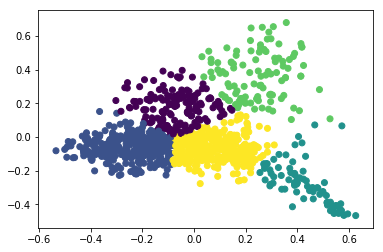

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Normalize the data.
X_norm = normalize(similarity_df)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()



In [55]:
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, Y))

Comparing k-means clusters against the data:
sentiment    0    1
row_0              
0           63   92
1          148  165
2           51   29
3           42   62
4          196  152


In [56]:
y_pred

array([3, 0, 1, 4, 1, 4, 4, 4, 1, 4, 1, 2, 4, 4, 1, 1, 4, 1, 3, 4, 1, 1,
       0, 0, 4, 0, 4, 0, 1, 1, 0, 0, 3, 0, 3, 1, 1, 1, 4, 1, 1, 4, 4, 1,
       0, 1, 0, 0, 2, 1, 1, 4, 0, 4, 1, 1, 0, 0, 1, 1, 4, 3, 1, 2, 3, 1,
       4, 4, 1, 4, 1, 0, 1, 4, 3, 0, 1, 1, 0, 0, 4, 0, 1, 3, 0, 0, 1, 0,
       4, 1, 0, 0, 2, 4, 4, 2, 2, 4, 1, 0, 1, 1, 4, 0, 3, 4, 1, 0, 2, 4,
       4, 1, 3, 4, 4, 4, 1, 4, 4, 0, 3, 0, 1, 1, 3, 4, 3, 1, 4, 4, 3, 4,
       1, 0, 4, 4, 4, 0, 4, 1, 4, 1, 1, 1, 0, 0, 0, 1, 4, 4, 1, 3, 4, 1,
       4, 0, 0, 1, 3, 1, 4, 1, 0, 4, 3, 4, 3, 4, 4, 3, 1, 3, 1, 3, 0, 4,
       4, 0, 2, 4, 1, 4, 2, 1, 3, 1, 4, 4, 0, 1, 4, 1, 1, 1, 1, 0, 4, 4,
       1, 0, 3, 1, 4, 4, 0, 1, 0, 4, 3, 4, 0, 4, 4, 2, 4, 1, 1, 1, 0, 0,
       4, 1, 0, 4, 4, 4, 3, 1, 0, 0, 3, 0, 4, 4, 0, 4, 1, 4, 2, 0, 4, 0,
       1, 1, 3, 4, 4, 3, 0, 4, 4, 4, 1, 3, 1, 1, 4, 4, 4, 1, 3, 4, 1, 1,
       1, 4, 1, 1, 4, 4, 3, 4, 4, 0, 1, 4, 1, 1, 2, 4, 1, 4, 4, 3, 4, 0,
       4, 4, 3, 0, 4, 4, 0, 2, 2, 4, 4, 0, 2, 1, 1,

**Looking at clusters**

In [57]:
sms_raw['cluster']=y_pred

In [58]:
sms_raw[sms_raw['cluster']==3]

,text,sentiment,cluster
0,Wow... Loved this place.,1,3
18,"This place is not worth your time, let alone V...",0,3
32,I found this place by accident and I could not...,1,3
34,"Overall, I like this place a lot.",1,3
61,This place receives stars for their APPETIZERS!!!,1,3
64,We are so glad we found this place.,1,3
74,I guess I should have known that this place wo...,0,3
83,This place has it!,1,3
104,This is one of the better buffets that I have ...,1,3
112,This is a really fantastic Thai restaurant whi...,1,3


In [59]:
sms_raw[sms_raw['cluster']==2]

,text,sentiment,cluster
11,Would not go back.,0,2
48,If you want a sandwich just go to any Firehous...,1,2
63,We'd definitely go back here again.,1,2
92,"Never been to Hard Rock Casino before, WILL NE...",0,2
95,We'll never go again.,0,2
96,Will be back again!,1,2
108,Will go back next trip out.,1,2
178,"Not a weekly haunt, but definitely a place to ...",1,2
182,I dressed up to be treated so rudely!,0,2
213,Won't go back.,0,2
